In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, roc_curve, roc_auc_score
from xgboost import XGBClassifier
%matplotlib inline

In [2]:
rawData = pd.read_csv("projeto4_telecom_treino.csv")
rawData.head(5)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [3]:
rawData.columns

Index(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [4]:
rawData.shape

(3333, 21)

In [5]:
pd.isna(rawData).sum().sum()

0

In [6]:
del rawData["Unnamed: 0"]

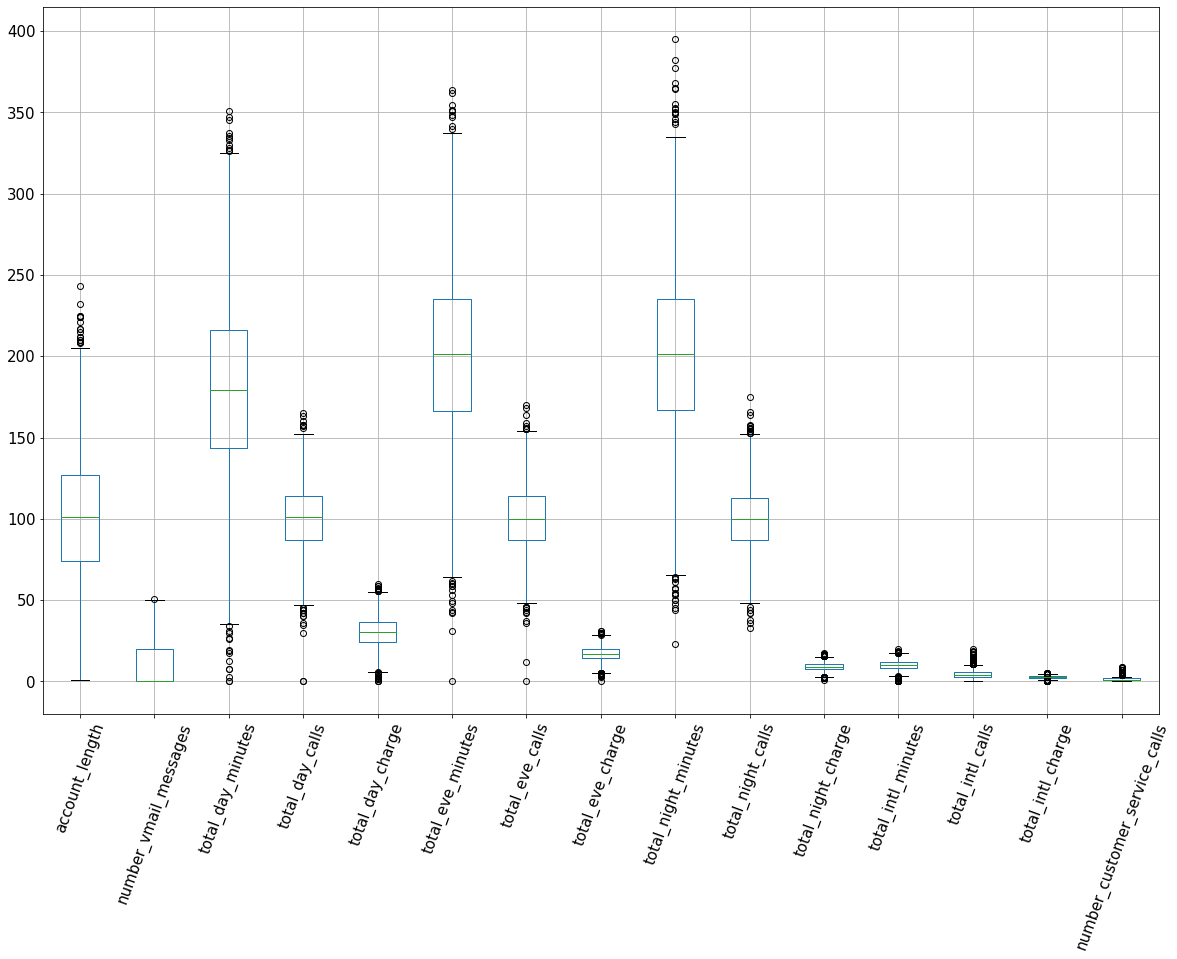

In [7]:
figure = plt.figure(figsize = (20,13))
rawData.boxplot(rot = 70, fontsize=15)
plt.show()

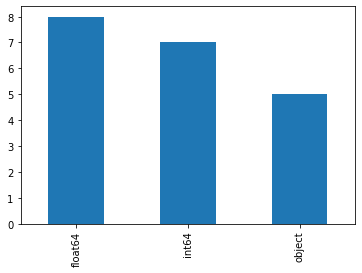

In [8]:
rawData.dtypes.value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC1C127088>,
      dtype=object)

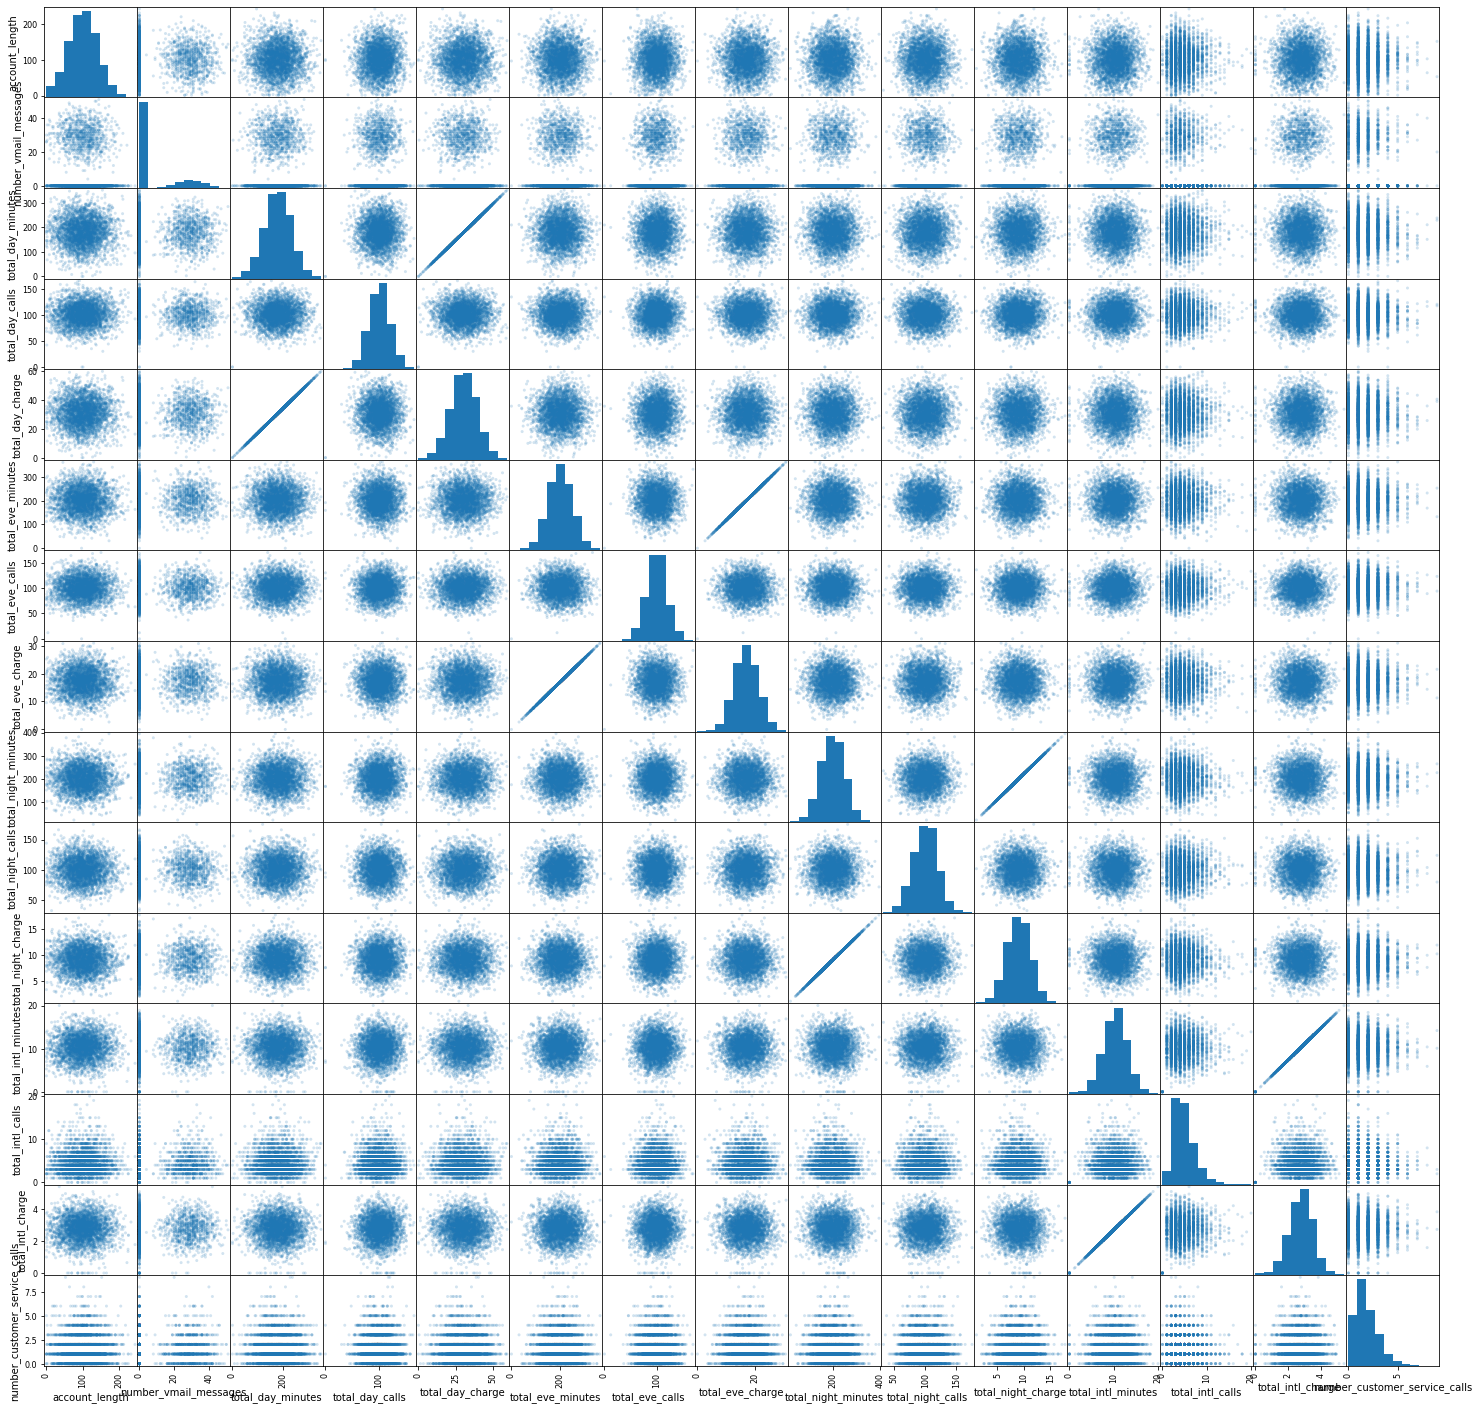

In [9]:
pd.plotting.scatter_matrix(rawData, alpha = 0.2, figsize = (25,25))

In [10]:
corr = rawData.corr()

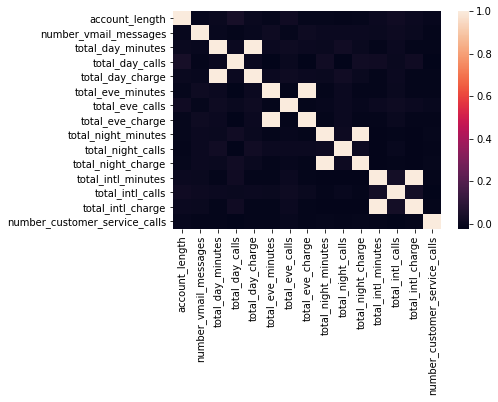

In [11]:
sns.heatmap(corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC2328A208>,
      dtype=object)

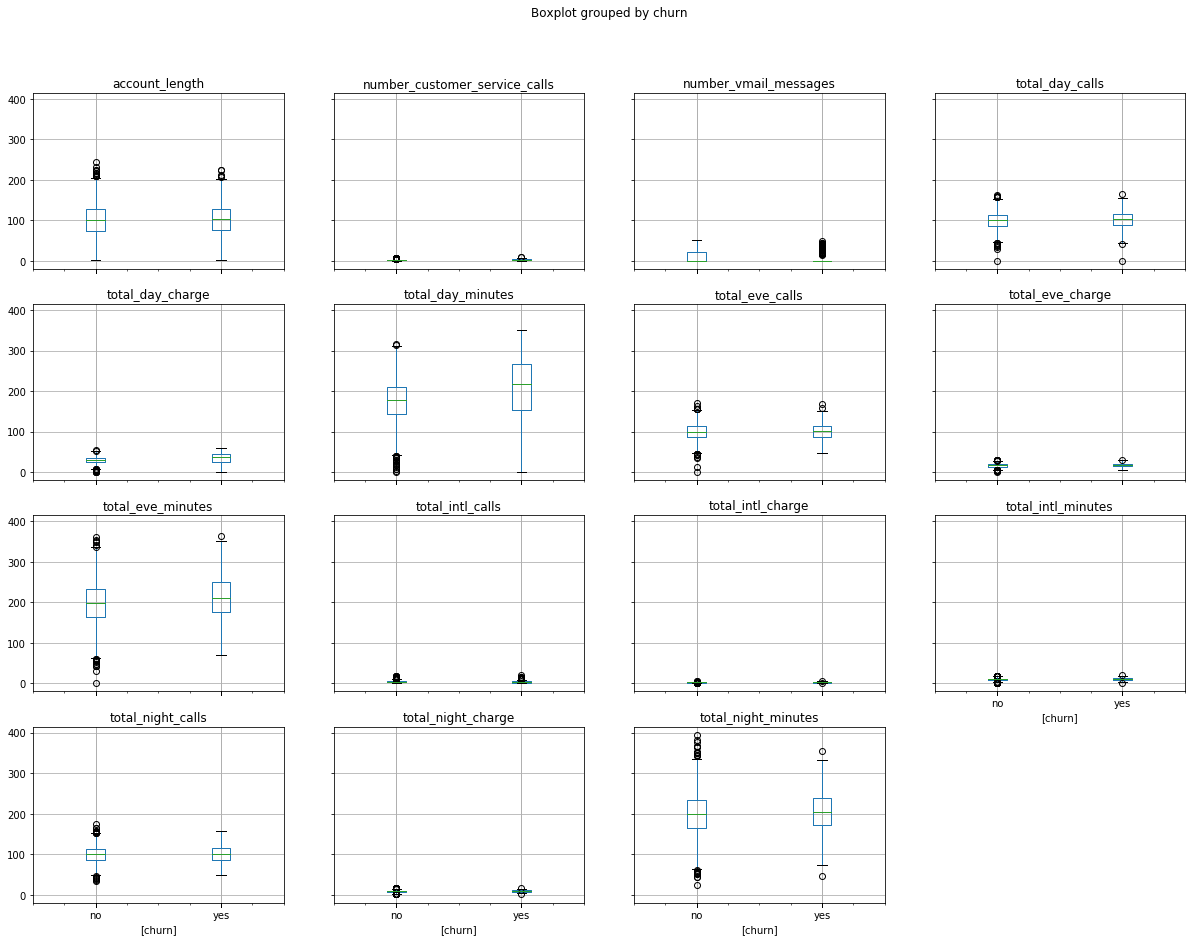

In [12]:
rawData.boxplot(by = 'churn', figsize = (20,15))

In [13]:
colunasObjecto = []
for coluna in rawData.columns:
    if rawData[coluna].dtype == 'object':
        colunasObjecto.append(coluna)
colunasObjecto

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [14]:
states = pd.Series(rawData.state.unique())
states
areaCodes = rawData.area_code.unique()
areaCodes
intPlans = rawData.international_plan.unique()
intPlans
voiceMPlan = rawData.voice_mail_plan.unique()
voiceMPlan
churn_ = rawData.churn.unique()
churn_

array(['no', 'yes'], dtype=object)

In [15]:
type(states)

pandas.core.series.Series

In [16]:
rawData.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


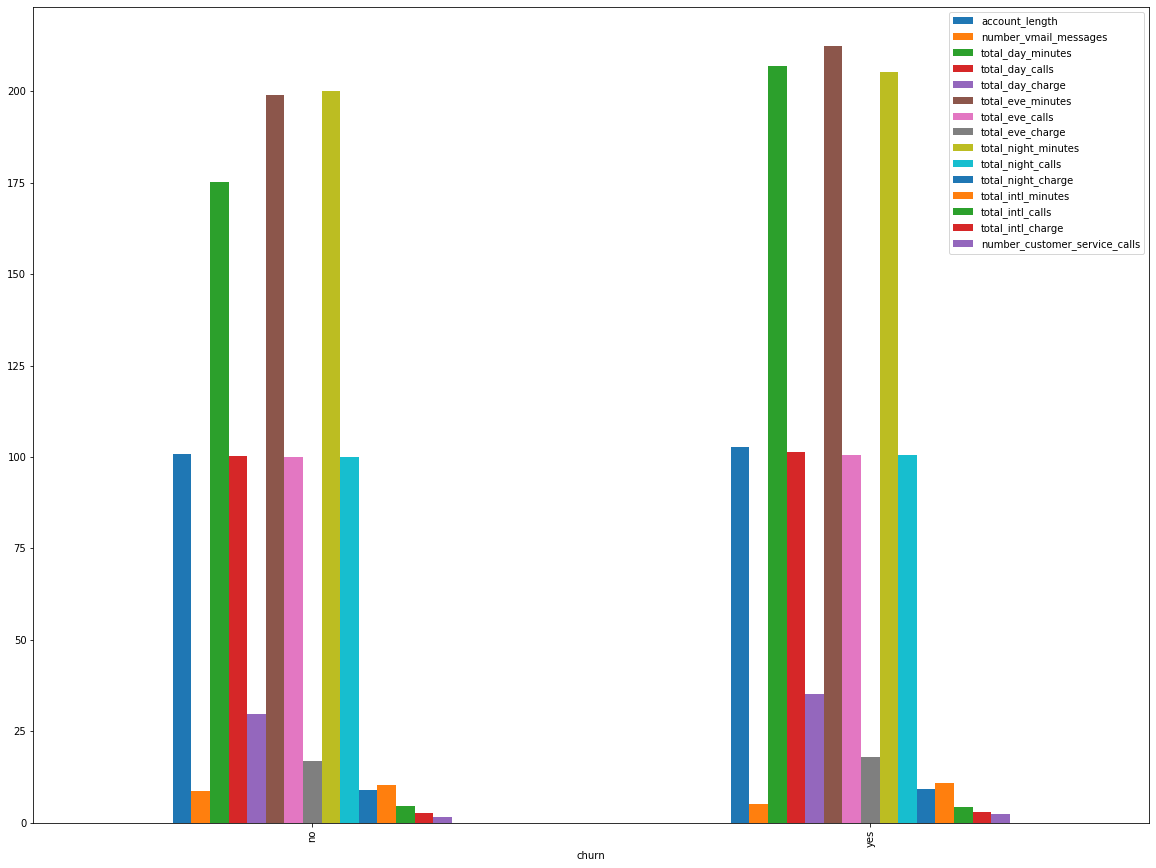

In [17]:
rawData.groupby('churn').agg("mean").plot.bar(by = 'churn', figsize = (20,15))

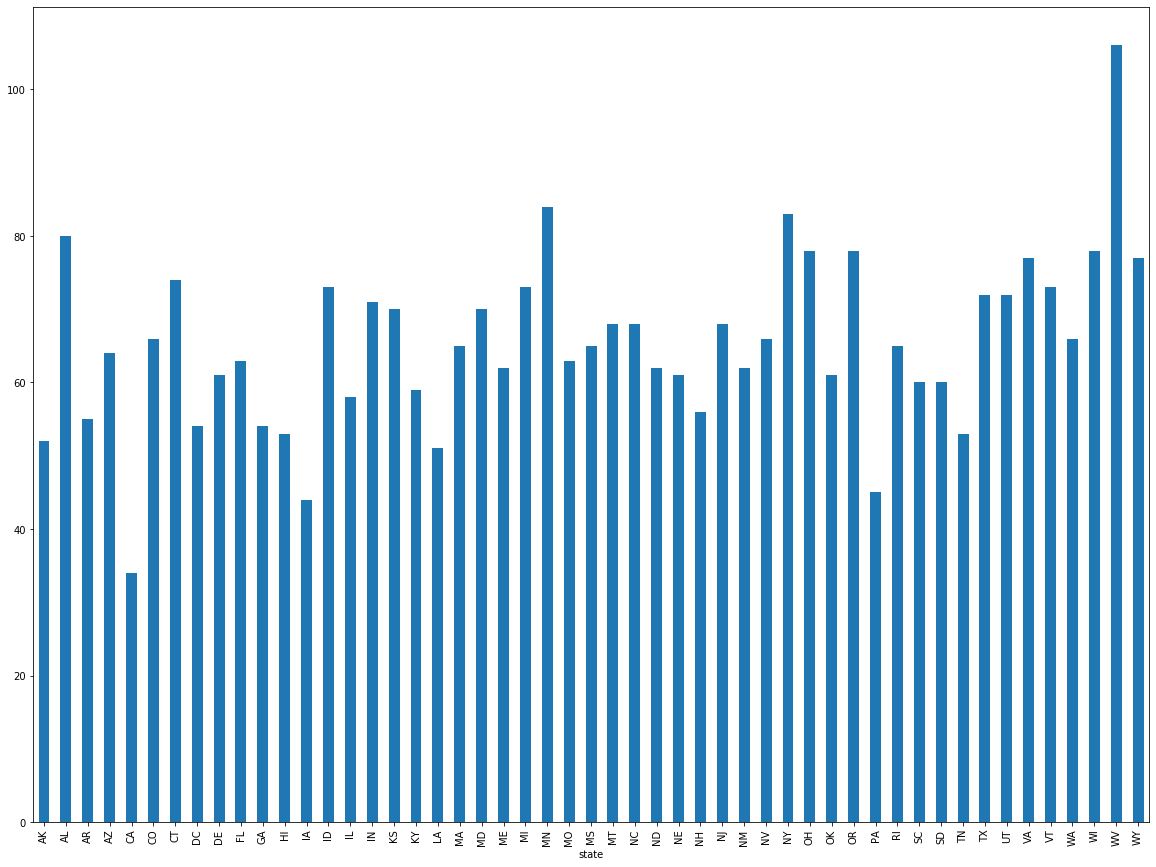

In [18]:
rawData.groupby('state')['churn'].count().plot.bar(figsize = (20,15))

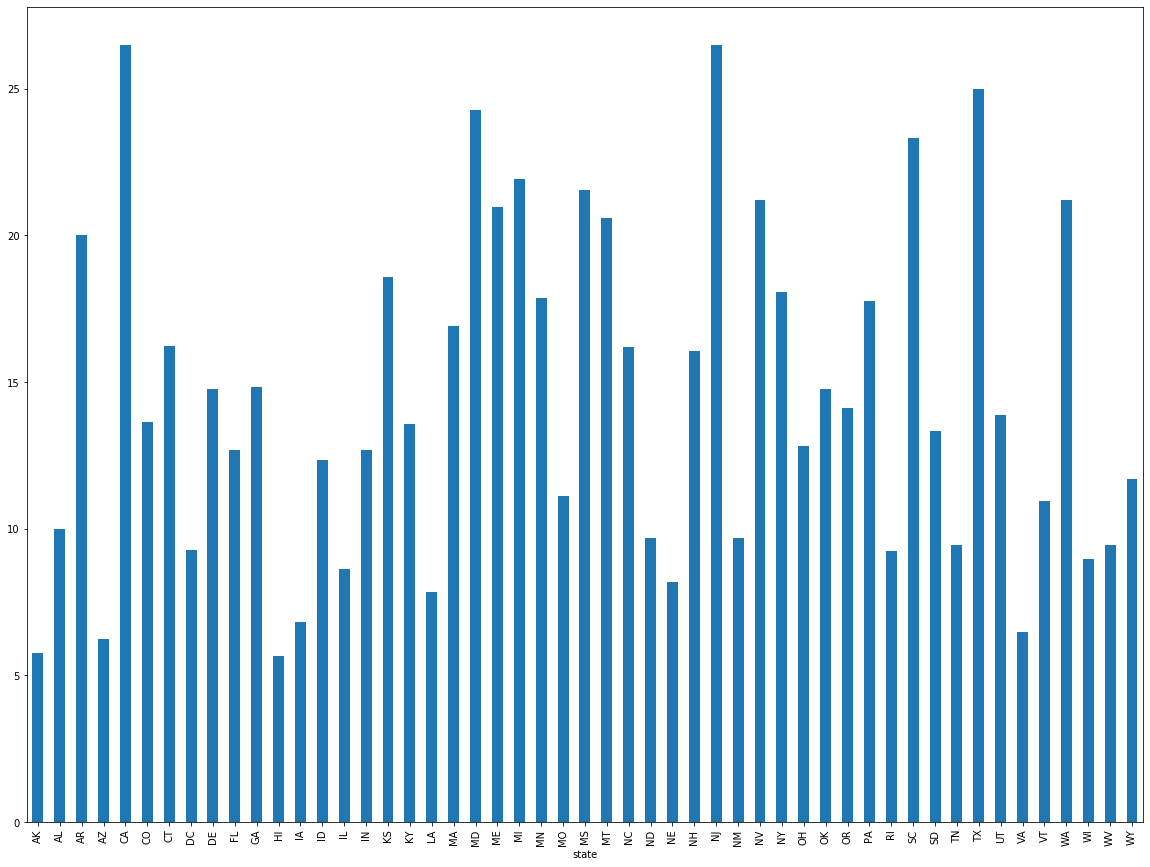

In [19]:
churnRelativoPorEstado =  (rawData[rawData['churn'] == 'yes'].groupby('state')['churn'].count()/rawData.groupby("state")["churn"].count())*100
churnRelativoPorEstado.plot.bar(figsize = (20,15))

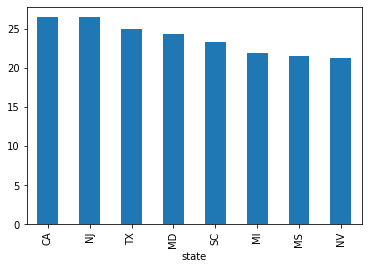

In [20]:
# Estados com o maior churn
churnRelativoPorEstado.sort_values(ascending=False).head(8).plot.bar()

In [21]:
def convertAreaCode(valor):
    retorno = 0
    if valor =='area_code_408':
        retorno = 0
    elif valor =='area_code_415':
        retorno = 1
    elif valor =="area_code_510":
        retorno =2
    return retorno
    
def retornaConformeIdx(valor):
    # a variável "states" deve ser uma série do pandas
    return states[states == valor].index[0]
    
def transformDataset(dataset):
    copia = dataset.copy()
    colunasYesNo = ['international_plan', 'voice_mail_plan', 'churn']
    for coluna in colunasYesNo:
        copia[coluna] = copia[coluna].map(lambda x: 1 if x == "yes" else 0)
   
    copia["state"] = copia['state'].map(retornaConformeIdx)
    copia["area_code"] = copia['area_code'].map(convertAreaCode)    
    
    return copia

In [22]:
dataFrameCopy = rawData.copy()
colunasYesNo = ['international_plan', 'voice_mail_plan', 'churn']
for coluna in colunasYesNo:
    dataFrameCopy[coluna] = dataFrameCopy[coluna].map(lambda x: 1 if x == "yes" else 0)
dataFrameCopy

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,area_code_415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,area_code_510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,area_code_510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [23]:
datasetAjustado = transformDataset(rawData)
datasetAjustado

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,3,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,20,192,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,8,68,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,10,28,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,49,184,2,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


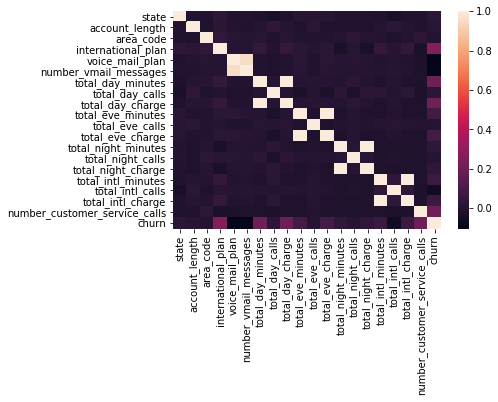

In [24]:
corrAjustado = datasetAjustado.corr()
sns.heatmap(corrAjustado)

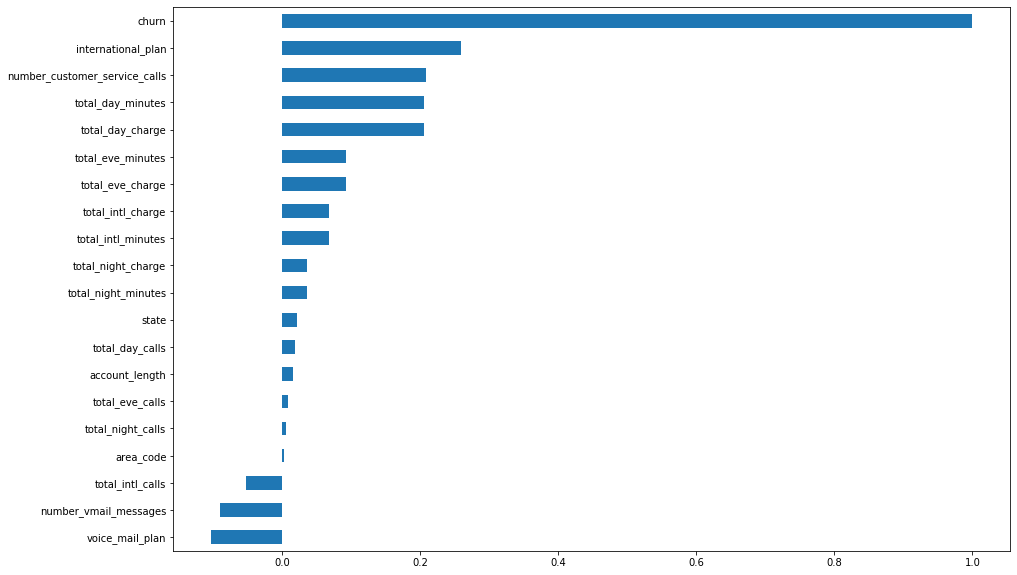

In [25]:
# tentando entender quais variáveis estão mais relacionadas com a variável target
corrAjustado.churn.sort_values().plot.barh(fontsize = 10, figsize = (15,10))

In [26]:
datasetAjustado.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

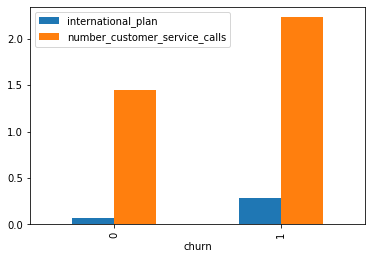

In [27]:
datasetAjustado.groupby('churn').agg('mean')[["international_plan","number_customer_service_calls"]].plot.bar()

In [28]:
datasetAjustado.dtypes

state                              int64
account_length                     int64
area_code                          int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [29]:
#A análise exploratória dos dados conclui que as variáveis acima mostradas, tais como
#international_plan , number_customer_service_calls, total_day_charge são as variáveis com maior correlação positiva com a variável alvo
# já as variáveis : voice_mail_plan, number_vmail_messages, total_intl_calls possuem correlação negativa

In [30]:
datasetAjustado.shape

(3333, 20)

In [31]:
x = datasetAjustado.iloc[:,0:19]
y = datasetAjustado.iloc[:,19]

nTrees = 50
seed = 7

model = RandomForestClassifier(n_estimators=nTrees, random_state=seed)
model.fit(x, y)


RandomForestClassifier(n_estimators=50, random_state=7)

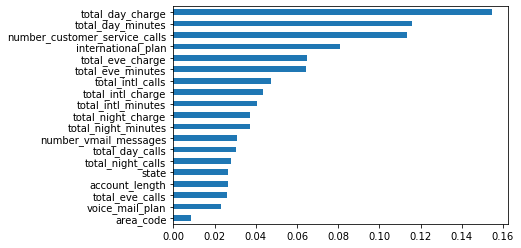

In [32]:
# utilizando o randomforest para tentar entender quais variáveis são mais importantes para a construção do modelo
importanciaDF = pd.DataFrame({"importancia": model.feature_importances_},
                            index=x.columns)
importanciaDF.importancia.sort_values().plot.barh()

# agora iniciar a etapa de análise preditiva com a criação dos modelos

In [33]:
rawTestData = pd.read_csv("projeto4_telecom_teste.csv")
rawTestData = rawTestData.drop("Unnamed: 0", axis=1)
rawTestData

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
1663,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,yes
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no


In [34]:
testData = transformDataset(rawTestData)
testData

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,24,101,2,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,12,137,2,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,1,103,0,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,41,99,1,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,21,108,1,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,24,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
1663,8,152,1,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
1664,43,61,1,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
1665,43,109,2,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [35]:
# Comecarei definindo uma função que irá realizar a escala dos dados
def datasetScaler(dataset):
    datasetScaled = dataset.copy()
    numColAjustar = dataset.shape[1]
    colunasMaiores1 = [col for col in dataset.iloc[:,0:numColAjustar].columns if dataset[col].max() >1]
    scaler = MinMaxScaler(feature_range = (0,1))

    toScale = dataset[colunasMaiores1]
    scaled = pd.DataFrame(scaler.fit_transform(toScale), columns=colunasMaiores1)


    for col in colunasMaiores1:
        datasetScaled[col] = scaled[col]
    return datasetScaled

In [36]:
datasetAjustado = datasetScaler(datasetAjustado)
testData = datasetScaler(datasetAjustado)

In [37]:
x_treino = datasetAjustado.iloc[:,0:19]
y_treino = datasetAjustado.iloc[:,19]
x_teste = testData.iloc[:,0:19]
y_teste = testData.iloc[:,19]

In [38]:
model = LogisticRegression(solver = 'lbfgs',max_iter=1500)

kfold = KFold(n_splits=10, shuffle=True,random_state=7)
resultado = cross_val_score(model, x_treino,y_treino,cv = kfold, scoring="roc_auc")

print("Acurácia %.3f" % (resultado.mean()*100))

Acurácia 81.984


In [39]:
# Construindo uma função que : divide o dataset em treino e teste, além de já protar as principais métricas que quero utilizar
# para avaliar o modelo
def testeDataset(dataset, model):

    numColunas = dataset.shape[1]
    x = dataset.iloc[:,0:numColunas-1]
    y = dataset.iloc[:, numColunas-1]
    
    x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=7)
    
    model.fit(x_treino,y_treino)
    predicoes = model.predict(x_teste)
    accuracy = accuracy_score(y_teste, predicoes)
    recall = recall_score(y_teste, predicoes)
    precision = precision_score(y_teste, predicoes)
    print("Acurácia = %.2f, \nRecall = %.2f \nPrecision = %.2f" % (accuracy, recall,precision))
    cm = confusion_matrix(y_teste, predicoes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot = True, cmap = "Blues")

In [40]:
datasetCombinado = pd.concat([datasetAjustado,testData])
datasetCombinado

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.00,0.524793,0.5,0,1,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0
1,0.02,0.438017,0.5,0,1,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0
2,0.04,0.561983,0.5,0,0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0
3,0.02,0.342975,0.0,1,0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0
4,0.06,0.305785,0.5,1,0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.40,0.789256,0.5,0,1,0.705882,0.445268,0.466667,0.445171,0.592521,0.741176,0.592688,0.688273,0.352113,0.688583,0.495,0.30,0.494444,0.222222,0
3329,0.16,0.276860,0.5,0,0,0.000000,0.658780,0.345455,0.658786,0.421776,0.323529,0.421870,0.452125,0.633803,0.452481,0.480,0.20,0.479630,0.333333,0
3330,0.20,0.111570,1.0,0,0,0.000000,0.515393,0.660606,0.515426,0.794061,0.341176,0.794241,0.453739,0.408451,0.454274,0.705,0.30,0.705556,0.222222,0
3331,0.98,0.756198,1.0,1,0,0.000000,0.609464,0.636364,0.609490,0.438823,0.494118,0.439016,0.311996,0.732394,0.312014,0.250,0.50,0.250000,0.222222,0


LR: 0.819946 (0.024765)
LDA: 0.823378 (0.023100)
NB: 0.843876 (0.024487)


C:\Users\RodrigoS\Anaconda37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\RodrigoS\Anaconda37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\RodrigoS\Anaconda37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\RodrigoS\Anaconda37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\RodrigoS\Anaconda37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeigh

KNN: 0.927226 (0.019610)
CART: 0.988372 (0.011012)
SVM: 0.915268 (0.019558)
RF: 0.997686 (0.005061)
ADA: 0.894215 (0.013017)


C:\Users\RodrigoS\Anaconda37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RodrigoS\Anaconda37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RodrigoS\Anaconda37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RodrigoS\Anaconda37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RodrigoS\Anaconda37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RodrigoS\Anaconda37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RodrigoS\Anaconda37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RodrigoS\Anaconda37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RodrigoS\Anaconda37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RodrigoS\Anaconda37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 0.994922 (0.007863)


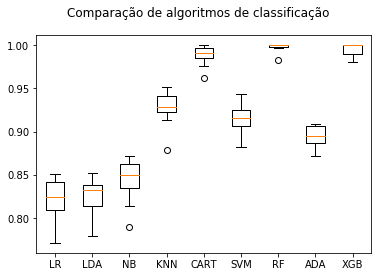

In [41]:
num_folds = 10
seed = 7

X = datasetCombinado.iloc[:,0:19]
Y = datasetCombinado.iloc[:,19]

modelos = []
modelos.append(('LR',LogisticRegression()))
modelos.append(('LDA',LinearDiscriminantAnalysis()))
modelos.append(('NB',GaussianNB()))
modelos.append(('KNN',KNeighborsClassifier()))
modelos.append(('CART',DecisionTreeClassifier()))
modelos.append(('SVM',SVC()))
modelos.append(('RF',RandomForestClassifier()))
modelos.append(('ADA',AdaBoostClassifier()))
modelos.append(('XGB',XGBClassifier()))


resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds,shuffle = True, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" %(nome, cv_results.mean(),cv_results.std())
    print(msg)

    
fig = plt.figure()
fig.suptitle('Comparação de algoritmos de classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [42]:
#Verificamos acima que os algoritmos Randomforest e XGBClassifier mostraram a melhor performance para esse conjunto de dados
#Dessa forma seguirei com os dois afim de avaliar qual é mais adequado

Acurácia = 0.98, 
Recall = 0.87 
Precision = 0.98


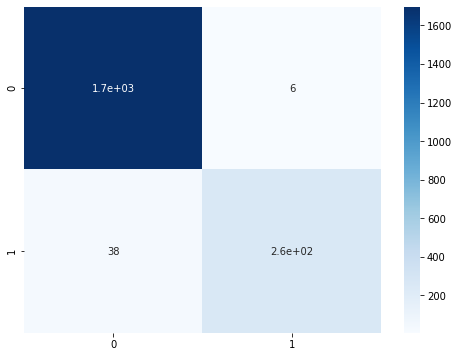

In [43]:
num_folds = 10
seed = 7

num_trees = 100
max_features = 3

model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
testeDataset(datasetCombinado, model)

[15:18:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia = 0.98, 
Recall = 0.90 
Precision = 0.99


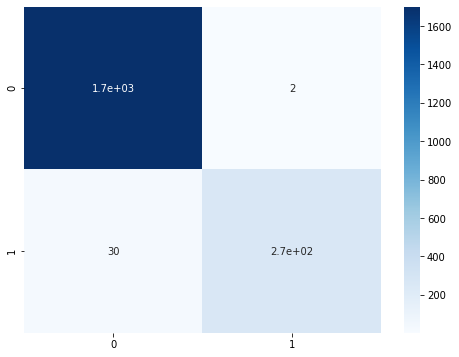

In [44]:
num_folds = 10
seed = 7

num_trees = 100
max_features = 3

model = XGBClassifier(n_estimators=num_trees, use_label_encoder = False)
testeDataset(datasetCombinado, model)

In [45]:
%%time

x = datasetCombinado.iloc[:, 0:19]
y = datasetCombinado.iloc[:,19]

param_test1 = {
 'max_depth':[3,4,5,6,7],
 'min_child_weight':[1,2,3]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',  scale_pos_weight=1, seed=seed, use_label_encoder = False), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x, y)

# Print do resultado
print("Acurácia: %.3f" % (gsearch1.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", gsearch1.best_estimator_)


[15:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia: 99.968
Melhores Parâmetros do Modelo:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=7, subsample=0.8, tree_method='exact',
              use_label_encoder=False,

In [46]:
gsearch1.best_params_

{'max_depth': 7, 'min_child_weight': 1}

[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia = 0.99, 
Recall = 0.91 
Precision = 1.00


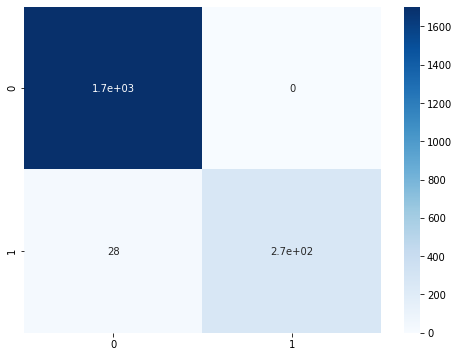

In [47]:
num_folds = 10

model = XGBClassifier(learning_rate =0.01, n_estimators=3000, max_depth=7,
                         min_child_weight=1, use_label_encoder = False)

testeDataset(datasetCombinado, model)

In [48]:
datasetTreino = datasetScaler(transformDataset(pd.read_csv("projeto4_telecom_treino.csv").drop("Unnamed: 0", axis = 1)))
datasetTeste = datasetScaler(transformDataset(pd.read_csv("projeto4_telecom_teste.csv").drop("Unnamed: 0", axis = 1)))


In [49]:
x_treino = datasetTreino.iloc[:,0:19]
y_treino = datasetTreino.iloc[:,19]
x_teste = datasetTeste.iloc[:,0:19]
y_teste = datasetTeste.iloc[:,19]

model = XGBClassifier(learning_rate =0.01, n_estimators=3000, max_depth=7,
                         min_child_weight=1, use_label_encoder = False)
model.fit(x_treino,y_treino)

[15:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=3000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [50]:
predicoes = model.predict(x_teste)

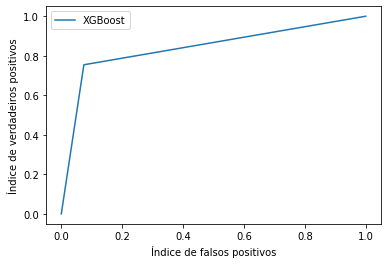

In [51]:
xgb_fpr, xgb_tpr, _ = roc_curve(y_teste, predicoes)

plt.plot(xgb_fpr, xgb_tpr, linestyle = "solid", label = "XGBoost")

plt.xlabel('Índice de falsos positivos')
plt.ylabel('Índice de verdadeiros positivos')

plt.legend()

plt.show()